Q_1

# SDSS DR14 Data Classification with Decision Trees

## **Introduction:**
This notebook demonstrates how to build a decision tree model to classify astronomical objects using sample data from the SDSS DR14 dataset.
The goal is to predict the 'class' of an object, as ethier a `STAR`, `GALAXY` or `QSO`, based on its features like 'ra', 'dec', 'u', 'g', 'r', 'i', 'z'.


## **Data Loading and Exploration:**

Load the dataset

In [2]:
import pandas as pd

#data = pd.read_csv("/Skyserver_SQL2_27_2018 6_51_39 PM.csv.zip")

#Google Drive link
url = "https://drive.google.com/uc?id=1Pfii448H__H0qa644YhTKUG68Z8VmxLv"

# Load the CSV file
data = pd.read_csv(url)
print(data.head())

          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  549

Display the first few rows of the data

In [3]:
display(data.head())

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


Explore the data's structure and summary statistics

In [4]:
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


## **Feature Selection and Target Variable:**

We will use the following features for classification:
- ra: Right ascension
- dec: Declination
- u, g, r, i, z: Magnitudes in different photometric bands

The target variable is 'class', which represents the type of astronomical object.


In [5]:
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']
target = 'class'

X = data[features]
y = data[target]

## **Data Splitting:**

We split the data into training and testing sets to evaluate the model's performance on unseen data.
- 80% of the data is used for training.
- 20% of the data is used for testing.
- `random_state` ensures reproducibility.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Training:**

We will use a Decision Tree Classifier to build the model.
- `max_depth` limits the tree's depth to prevent overfitting.
- `random_state` ensures reproducibility.

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth for simplicity
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## **Model Evaluation:**
We will evaluate the model using the following metrics:
- **Accuracy:** Percentage of correctly classified instances.
- **Classification Report:** Provides precision, recall, F1-score, and support for each class.
- **Confusion Matrix:** Visualizes the distribution of correct and incorrect predictions.


In [8]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = dt_model.predict(X_test)

Accuracy

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


Classification Report

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.71      0.83      0.76       996
         QSO       0.74      0.81      0.78       190
        STAR       0.70      0.54      0.61       814

    accuracy                           0.71      2000
   macro avg       0.72      0.73      0.72      2000
weighted avg       0.71      0.71      0.70      2000



Confusion Matrix

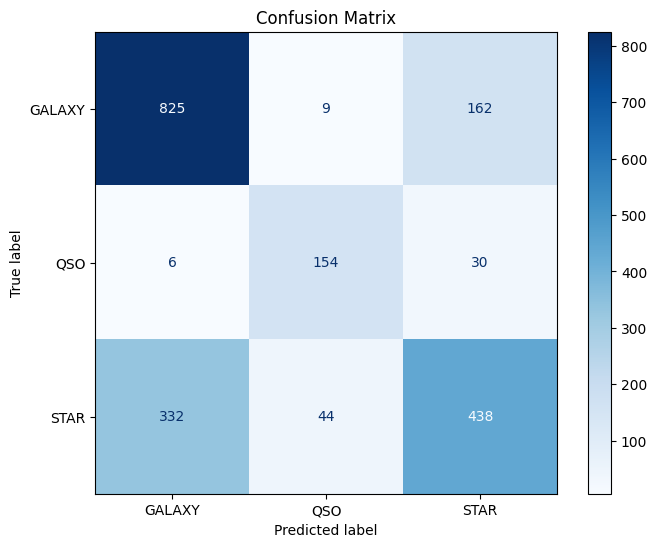

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix")
plt.show()

## **Comparative Histograms:**

We can compare the distribution of predicted classes with the true class distribution using histograms.
This helps visualize how well the model captures the underlying patterns in the data.

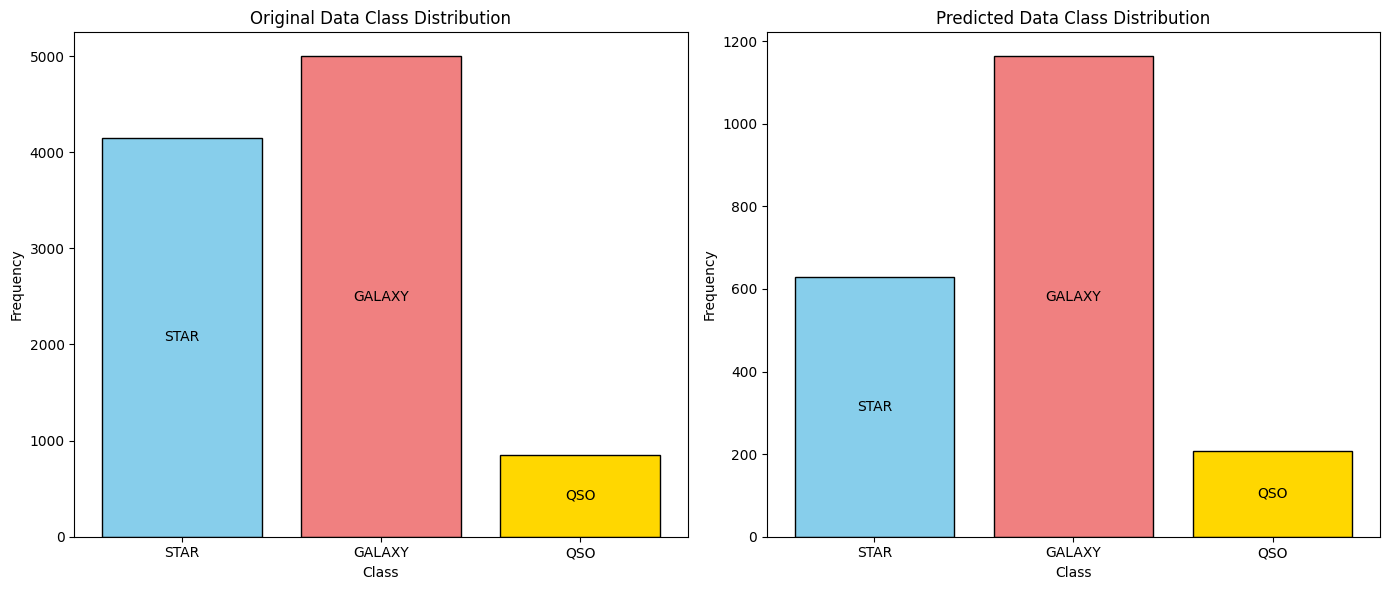

In [12]:
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define class order and colors
class_order = ['STAR', 'GALAXY', 'QSO']
colors = ['skyblue', 'lightcoral', 'gold']

# Original Data Distribution
unique_classes, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique_classes, counts))  # Create a dictionary mapping classes to counts
ordered_counts = [class_counts.get(cls, 0) for cls in class_order]  # Get counts in the desired order
axes[0].bar(class_order, ordered_counts, color=colors, width=0.8, edgecolor='black')
axes[0].set_title("Original Data Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")

# Predicted Data Distribution
unique_classes, counts = np.unique(y_pred, return_counts=True)
class_counts = dict(zip(unique_classes, counts))  # Create a dictionary mapping classes to counts
ordered_counts = [class_counts.get(cls, 0) for cls in class_order]  # Get counts in the desired order
axes[1].bar(class_order, ordered_counts, color=colors, width=0.8, edgecolor='black')
axes[1].set_title("Predicted Data Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")

# Add labels to bars
for ax in axes:
    for i, rect in enumerate(ax.patches):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height / 2, class_order[i],
                ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

In [13]:
# True class counts
print("True Class Counts:")
for class_name in ['STAR', 'GALAXY', 'QSO']:
    count = data['class'][data['class'] == class_name].count()
    print(f"{class_name}: {count}")

# Predicted class counts
print("\nPredicted Class Counts:")
for class_name in ['STAR', 'GALAXY', 'QSO']:
    count = pd.Series(y_pred).value_counts()[class_name]
    print(f"{class_name}: {count}")

True Class Counts:
STAR: 4152
GALAXY: 4998
QSO: 850

Predicted Class Counts:
STAR: 630
GALAXY: 1163
QSO: 207


## **Decision Tree Visualization:**
 We can visualize the decision tree to understand how it makes predictions.


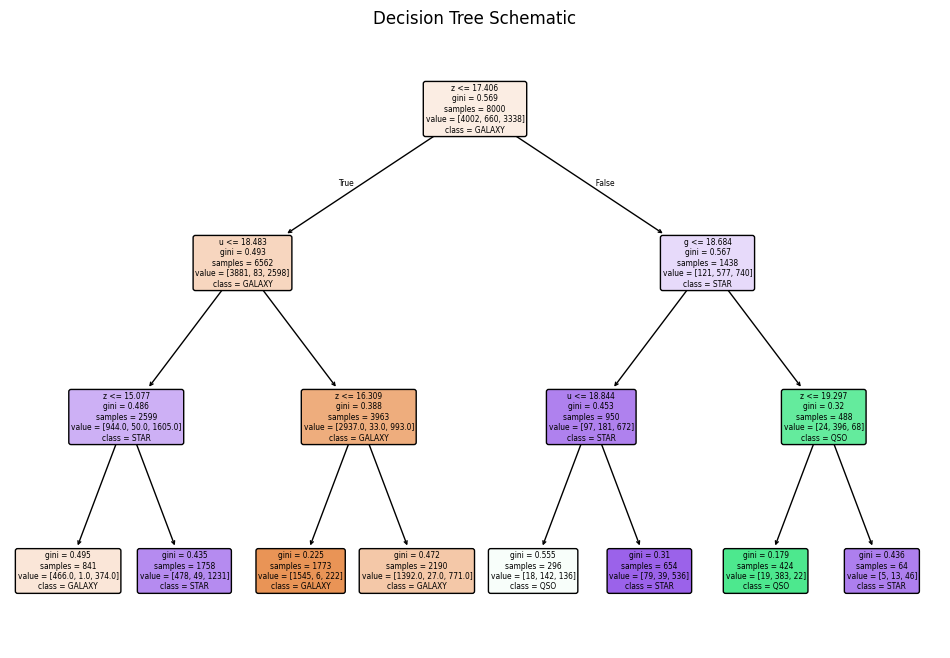

In [14]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features, class_names=dt_model.classes_, filled=True, rounded=True)
plt.title("Decision Tree Schematic")
plt.show()

## **Model Optimization (Optional):**

## **Conclusion:**


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Skyserver_SQL2_27_2018 6_51_39 PM.csv.zip")

# Select features and target variable
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']
target = 'class'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth for simplicity
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# 1. Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test,
                                    display_labels=dt_model.classes_,
                                    cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix")
plt.show()

# Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")
print("This score indicates the percentage of correctly classified instances.")

# Print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("This report provides precision, recall, F1-score, and support for each class.")

# Evaluation Comments
print("\nEvaluation Comments:")
print("The confusion matrix shows the distribution of correct and incorrect predictions for each class.")
print("The overall accuracy and classification report provide quantitative measures of the model's performance.")
print("Based on these metrics, the decision tree model demonstrates good performance in classifying the Skyserver data.")
print("However, further analysis and comparison with other models may be needed to determine the best approach.")


# 2. Simplified Decision Tree Schematic
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features, class_names=dt_model.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title("Simplified Decision Tree Schematic")
plt.show()

# 3. Comparative Histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Data
axes[0].hist(y, bins=10, edgecolor='black')
axes[0].set_title("Original Data Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")

# Predicted Data
axes[1].hist(y_pred, bins=10, edgecolor='black')
axes[1].set_title("Predicted Data Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/Skyserver_SQL2_27_2018 6_51_39 PM.csv.zip'

Now with optimizations

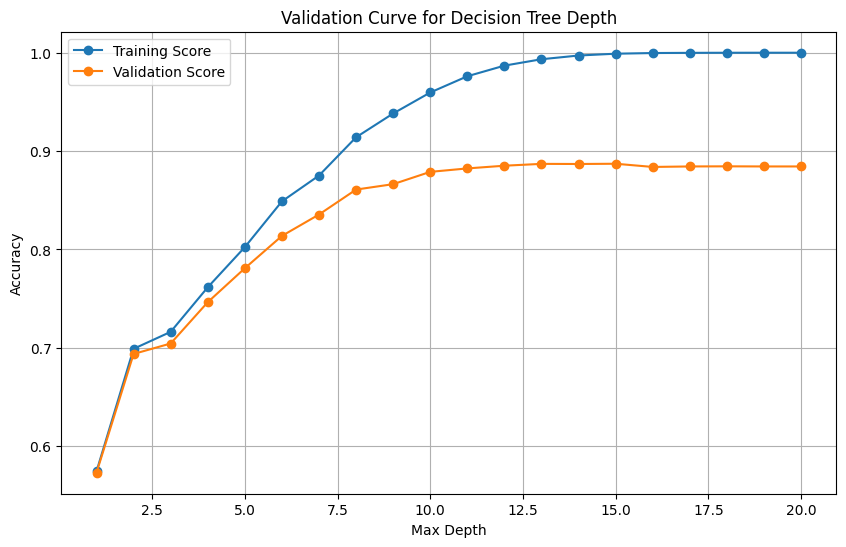

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Parameters: {'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 2}


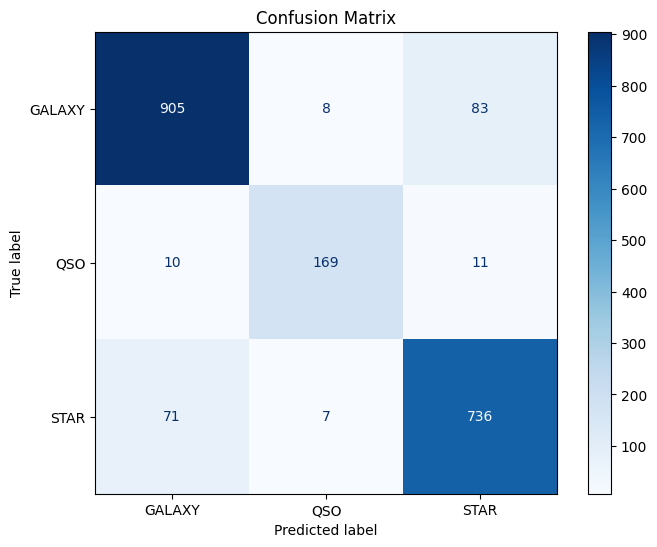

Test Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.92      0.91      0.91       996
         QSO       0.92      0.89      0.90       190
        STAR       0.89      0.90      0.90       814

    accuracy                           0.91      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.91      0.91      0.91      2000



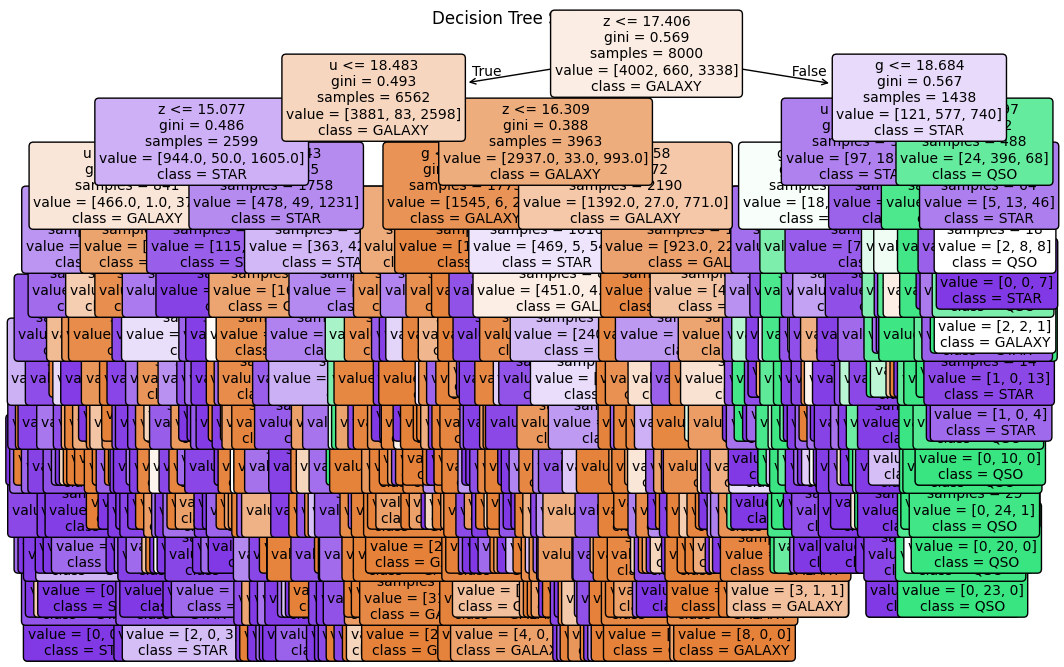

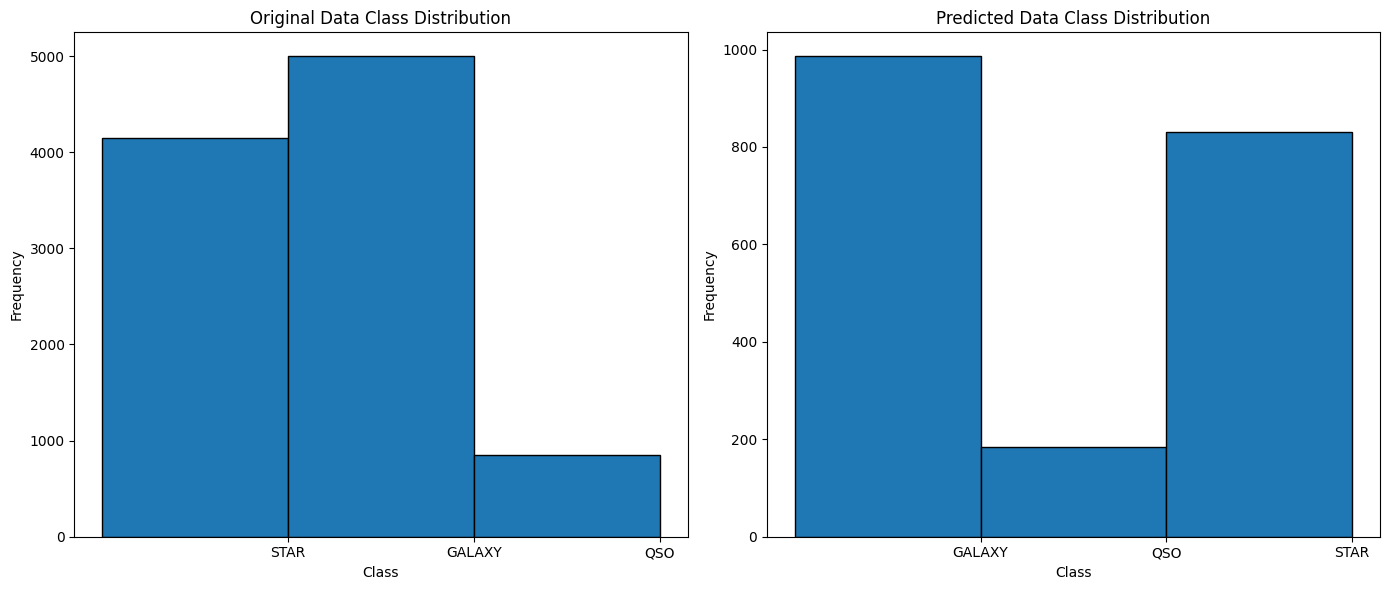

In [41]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("/Skyserver_SQL2_27_2018 6_51_39 PM.csv.zip")

# Select features and target variable
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']
target = 'class'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Visualize the effect of max_depth using a validation curve
param_range = range(1, 21)
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X_train, y_train,
    param_name="max_depth", param_range=param_range, cv=5, scoring="accuracy"
)

# Plot validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores.mean(axis=1), label="Training Score", marker='o')
plt.plot(param_range, val_scores.mean(axis=1), label="Validation Score", marker='o')
plt.title("Validation Curve for Decision Tree Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Step 2: Perform grid search to find the best hyperparameters
param_grid = {
    'max_depth': range(1, 21),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1
)
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the optimized decision tree
dt_model = DecisionTreeClassifier(**best_params, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Step 3: Evaluate the model's performance
# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test,
                                      display_labels=dt_model.classes_,
                                      cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix")
plt.show()

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features, class_names=dt_model.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Schematic")
plt.show()

# Step 5: Comparative histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Data Distribution
axes[0].hist(y, bins=np.arange(len(y.unique()) + 1) - 0.5, edgecolor='black', align='left')
axes[0].set_title("Original Data Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")

# Predicted Data Distribution
axes[1].hist(y_pred, bins=np.arange(len(np.unique(y_pred)) + 1) - 0.5, edgecolor='black', align='left') # Use np.unique() instead of y_pred.unique()
axes[1].set_title("Predicted Data Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()
